Análise de dados do banco SSI

In [3]:
import sqlalchemy as sa
import pandas as pd 
import matplotlib.pyplot as plt



In [4]:
server_name = "10.126.111.184"
database_name = "SSI_CONSULTA"
driver = "SQL Server Native Client 11.0"

connection_string = f"mssql+pyodbc://@{server_name}/{database_name}?driver={driver}"
engine = sa.create_engine(connection_string)

query = "SELECT * FROM dbo.TB_AUTOMACAO_KPI"

df = pd.read_sql(query, engine)

display(df)

,ANO,ID_PED,NUMERO_SSI_PED,SSI_ASSOCIADA,RESPONSAVEL_TECNICO,PRIORIDADE,SOLICITANTE,ID_AREA_SOLICITANTE,SIGLA_AREA_SOLICITANTE,DESCRICAO_AREA_SOLICITANTE,...,PRAZO_EXECUCAO,CONCLUSAO,ID_STATUS,DESC_STATUS,ID_TITULO,TITULO_SSI,MOTIVACAO,REFERENCIA,APLICACAO,OBJETIVO
0,2019,44221,P069008/0919,None,CLAUDEMIR ALONSO GONCALES TAVARES,Não Urgente,LUIZ ANTONIO ALVES DA COSTA,1107,P#B#HAB,GER ACESSO FIXO E FTTX,...,2019-10-30,2019-10-30 08:37:54.130,5,Execução,1336,CLIMATIZAÇÃO,Melhoria da Rede,ETP 1231.3068 - Projeto executivo para readequ...,19_MELHORIA INFRA ACESSO E PREDIOS\t19_IN_PRED...,ETP 1231.3068 - Projeto executivo para readequ...
1,2019,44232,P069017/0919,None,-,Urgente,KAUAN RENNIER RICHTER,1074,P#B#ADC01,Coord Processos,...,NaT,NaT,40,Concluída - Finalizada Sem Sucesso,1187,Numeração Geral Fixa,Melhoria da Rede,None,TESTE,TESTE
2,2019,44237,P069022/0919,None,MARCO AURELIO MOMBERG DE CAMARGO,Urgente,LUIZ ANTONIO ALVES DA COSTA,1107,P#B#HAB,GER ACESSO FIXO E FTTX,...,2019-12-20,2019-09-12 13:43:30.790,22,Análise Técnica,1336,CLIMATIZAÇÃO,Melhoria da Rede,ETP 1231.3070 - Fornecimento e instalação de 0...,19_OBSOLESCENCIA E MODERNIZAÇÃO DE REDE\t19_IN...,ETP 1231.3070 - Fornecimento e instalação de 0...
3,2019,44279,P069059/0919,None,GUILHERME RAMOS DE MELLO,Urgente,RAFAEL ALBUQUERQUE DE LIMA,1107,P#B#HAB,GER ACESSO FIXO E FTTX,...,2019-11-11,2019-10-23 00:00:00.000,37,Concluída - Finalizada Com Sucesso,1337,OBRA CIVIL,Ampliação da Rede,ETP 1231.3087 - Projeto e Obra Civil de Amplia...,19_DADOS REDES\t19_IN_INFRA PREDIAL\tISP-INF01...,ETP 1231.3087 - Projeto e Obra Civil de Amplia...
4,2019,44290,P069072/0919,P065752/0719,JHONATAN WILSON DE SOUZA,Urgente,Andre Nascimento dos Santos,674,P#B#DCA,Gerencia Backbone Nacional IP TX,...,2019-09-20,2020-03-31 00:00:00.000,37,Concluída - Finalizada Com Sucesso,1091,Solicitação de Implantação de ETP (Especificaç...,Evolução da Rede,ETP 0040-0094.1-(TI)-BIP-KPI-(FO_VIVO_SWAP_CPL...,Ativar canais 100G no DWDM NOKIA e no DWDM INF...,ETP 0040-0094.1-(TI)-BIP-KPI-(FO_VIVO_SWAP_CPL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282995,2024,331237,P338965/0324,None,-,Não Urgente,YURI VINICIUS FELICIANO FERNANDES,674,P#B#DCA,Gerencia Backbone Nacional IP TX,...,2024-03-20,NaT,21,Análise de Viabilidade,1434,BBIP - Solicitação de Configuração,Alteração de ACL,Ajuste de anuncio Peering Facebook - cachefill,None,PLANEJAMENTO --: FACEBOOK --:HL1 --: Configura...
282996,2024,331238,P338966/0324,None,-,Não Urgente,TIAGO CARVALHO MARTINS,1107,P#B#HAB,GER ACESSO FIXO E FTTX,...,2024-07-31,NaT,21,Análise de Viabilidade,3018,B2B FIXA,Melhoria da Rede,ETP 1231.5756 - Infraestrutura para FTTX - Pol...,24_EXPANSÃO DE REDE B2B\t24_IN_INFRA\tIGO-INF1...,ETP 1231.5756 - Infraestrutura para FTTX - Pol...
282997,2024,331240,P338967/0324,None,-,Urgente,ANDRESSA PIRES GOMES,2334,P#BAEBGC0104,SUP REG SP 005,...,2024-03-18,NaT,21,Análise de Viabilidade,1274,DCN - VIVO I - Solicitação de Recursos,Ampliação da Rede,ATP 0367/23,None,NECESSÁRIO 1 IP NO RANGE 10.113.119.194 PARA G...
282998,2024,331243,P338971/0324,None,-,Não Urgente,FERNANDO SOUZA NICOLAU,497,RB#DB02,Ger. CS Móvel,...,2024-04-15,NaT,21,Análise de Viabilidade,2914,Alteração de Encaminhamento,Evolução da Rede,None,Core IMS - Preparação para o VoNR,Corte de 4 digitos da TAC 5G// RE: Continuação...


Informações Básicas:

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283000 entries, 0 to 282999
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ANO                         283000 non-null  int64         
 1   ID_PED                      283000 non-null  int64         
 2   NUMERO_SSI_PED              283000 non-null  object        
 3   SSI_ASSOCIADA               103564 non-null  object        
 4   RESPONSAVEL_TECNICO         283000 non-null  object        
 5   PRIORIDADE                  283000 non-null  object        
 6   SOLICITANTE                 283000 non-null  object        
 7   ID_AREA_SOLICITANTE         283000 non-null  int64         
 8   SIGLA_AREA_SOLICITANTE      283000 non-null  object        
 9   DESCRICAO_AREA_SOLICITANTE  282927 non-null  object        
 10  ID_AREA_REQUISITADA         265633 non-null  float64       
 11  SIGLA_AREA_REQUISITADA      265633 non-

None

In [6]:
display((df.isnull().sum()))

ANO                                0
ID_PED                             0
NUMERO_SSI_PED                     0
SSI_ASSOCIADA                 179436
RESPONSAVEL_TECNICO                0
PRIORIDADE                         0
SOLICITANTE                        0
ID_AREA_SOLICITANTE                0
SIGLA_AREA_SOLICITANTE             0
DESCRICAO_AREA_SOLICITANTE        73
ID_AREA_REQUISITADA            17367
SIGLA_AREA_REQUISITADA         17367
DESCRICAO_REQUISITADA          17367
DATA_CRIACAO                       0
PRAZO_EXECUCAO                 60198
CONCLUSAO                      42584
ID_STATUS                          0
DESC_STATUS                        0
ID_TITULO                          0
TITULO_SSI                         0
MOTIVACAO                          0
REFERENCIA                    128480
APLICACAO                     125486
OBJETIVO                        4218
dtype: int64

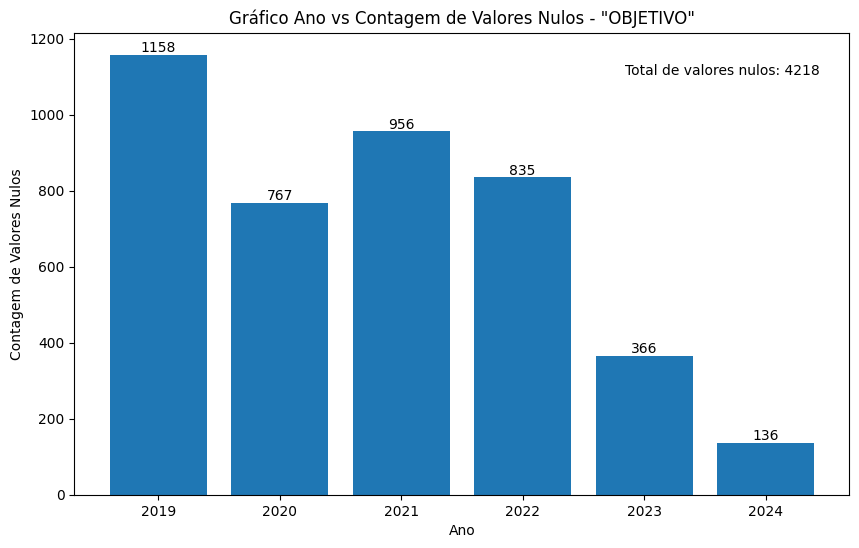

In [11]:
null_counts = df[df['OBJETIVO'].isnull()]['ANO'].value_counts().sort_index()
total_nulls = null_counts.sum()
# Plotando o gráfico de barras
plt.figure(figsize=(10,6))
bars = plt.bar(null_counts.index, null_counts.values)
plt.xlabel('Ano')
plt.ylabel('Contagem de Valores Nulos')
plt.title('Gráfico Ano vs Contagem de Valores Nulos - "OBJETIVO"')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

plt.figtext(0.87, 0.81, 'Total de valores nulos: {}'.format(total_nulls), horizontalalignment='right')
plt.show()

In [9]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from collections import Counter

frases = df['OBJETIVO']

palavras = []
for frase in frases:
    if frase is not None:  # Adiciona uma verificação para None
        palavras.extend(word_tokenize(frase))

# Conta a frequência de cada palavra
contador = Counter(palavras)

# Exibe as palavras mais comuns
display(contador.most_common())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A0157552\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[(':', 269836),
 ('de', 219880),
 ('-', 193532),
 ('--', 156059),
 (')', 137110),
 ('(', 135762),
 ('.', 102065),
 ('para', 94863),
 (',', 93679),
 ('a', 66865),
 ('do', 66764),
 ('DE', 62061),
 ('e', 57913),
 ('A', 48660),
 ('da', 47704),
 ('em', 45917),
 ('PARA', 37611),
 ('o', 33986),
 ('no', 30200),
 (']', 23018),
 ('[', 22970),
 ('1', 22576),
 ('na', 22055),
 ('ETP', 21967),
 ('O', 20475),
 ('CENTRAL', 19040),
 ('com', 18503),
 ('DA', 18212),
 ('anexo', 18046),
 ('/', 17752),
 ('FAVOR', 17185),
 ('VERIFICAR', 16438),
 ('POSSIBILIDADE', 16311),
 ('C', 15170),
 ('os', 14565),
 ('DDR', 14272),
 ('conforme', 13962),
 ('as', 13942),
 ('HL4', 13717),
 ('HL3', 13219),
 ('Favor', 13126),
 ('dos', 12911),
 ('PODERMOS', 12889),
 ('nos', 12824),
 ('projeto', 12448),
 ('MIGRAR', 12363),
 ('*', 12340),
 ('APROVISIONAR', 12264),
 ('novo', 12068),
 ('RAMAIS', 12047),
 (';', 12038),
 ('Configuração', 11868),
 ('&', 11633),
 ("''", 11579),
 ('Elementos', 11542),
 ('que', 11320),
 ('configuração', 